# Regularization Techniques

In [1]:
!pip install seaborn
!pip install mlxtend

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.6 kB 487.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.6 kB 651.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.6 kB 726.2 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.6 kB 708.1 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.6 kB 697.2 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.6 kB 731.4 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.6 kB 752.5 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.6 kB 737.3 kB/s eta 0:00:01
   --------------

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
x, y = make_moons(100, noise = 0.25, random_state = 2) 
#toy dataset with 2 features: 100 samples

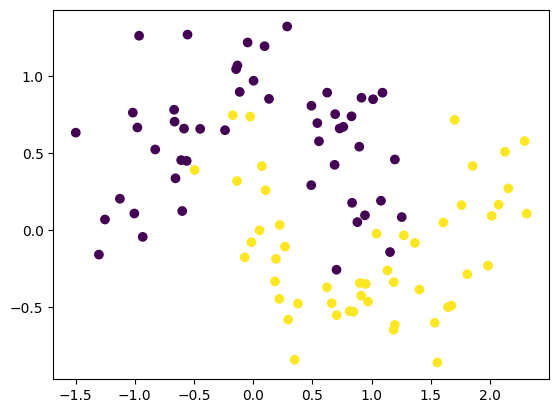

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c = y)
#to generate different colors with binary values in data
plt.show()

In [7]:
#Generate simple ANN network
model1 = Sequential()

model1.add(Dense(128, input_dim = 2, activation = "relu"))
model1.add(Dense(128, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [9]:
history1 = model1.fit(x, y, epochs = 2000, validation_split = 0.2, verbose = 0)

9600/9600 [==============================] - 6s 572us/step


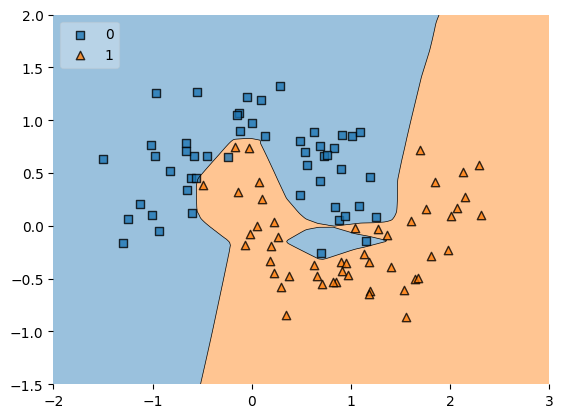

In [10]:
plot_decision_regions(x, y.astype('int'), clf = model1, legend = 2)
#x is for input data, y = integer labels, clf = model1 trained classifier,
#legend = 2 location of legend points
plt.xlim(-2, 3) #Set the limits of the x-axis
plt.ylim(-1.5, 2) #Set the limits of y-axis
plt.show()

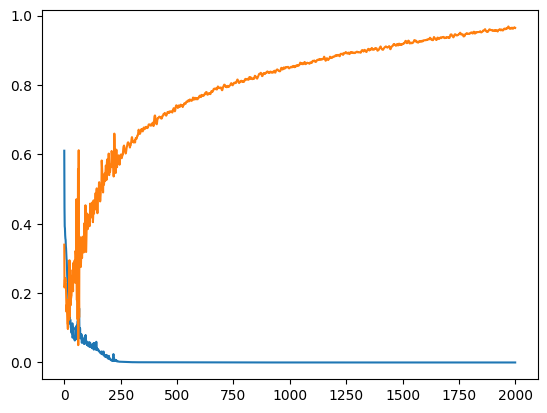

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [12]:
model2 = Sequential()

In [18]:
model2.add(Dense(128, input_dim = 2, activation = "relu", kernel_regularizer = tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(128, activation = "relu", kernel_regularizer = tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1, activation = "sigmoid"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
adam = Adam(learning_rate = 0.01)
model2.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [21]:
history2 = model2.fit(x, y, epochs = 2000, validation_split = 0.2, verbose = 0)

9600/9600 [==============================] - 6s 589us/step


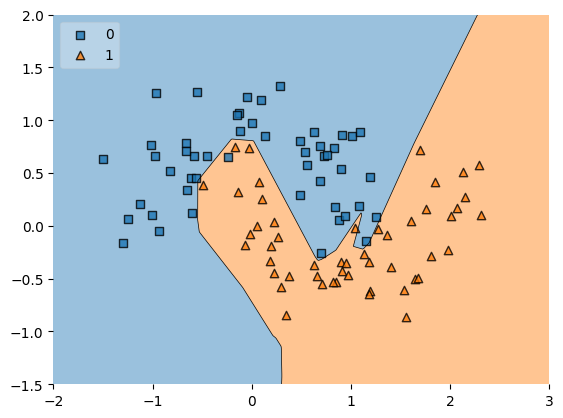

In [22]:
plot_decision_regions(x, y.astype('int'), clf = model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

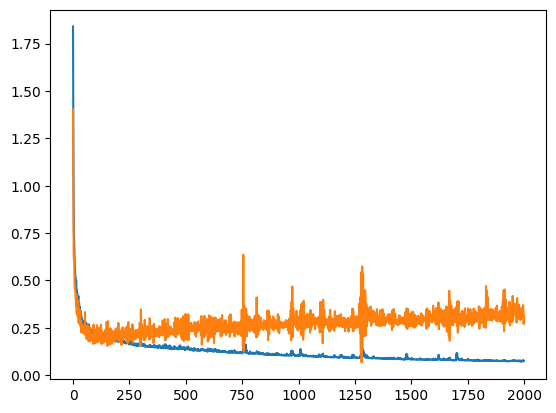

In [24]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [26]:
#Calculation of accuracy of each model
#Calculation of accuracy of model1
acc_model1 = history1.history['accuracy'][-1] * 100

#Calculate the accuracy of model2
acc_model2 = history2.history['accuracy'][-1] * 100

print(f"Accuracy for Model 1: {acc_model1:.2f}%")
print(f"Accuracy for Model 2: {acc_model2:.2f}%")

Accuracy for Model 1: 100.00%
Accuracy for Model 2: 100.00%
